In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


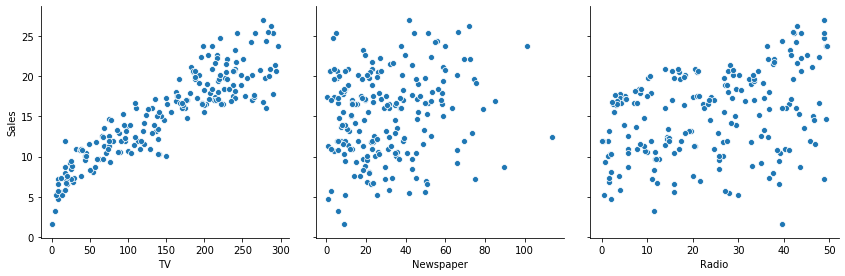

In [8]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',size=4,aspect=1,kind='scatter')
plt.show()

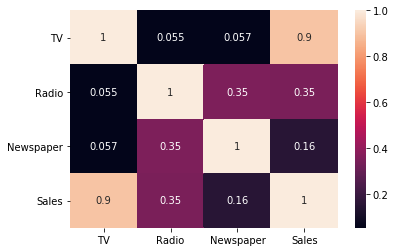

In [10]:
sns.heatmap(df.corr(),annot=True)

In [29]:
x=df[['TV']]
y=df[['Sales']]

In [30]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [32]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()

In [34]:
lr.params

const    7.164676
TV       0.053967
dtype: float64

In [35]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     587.8
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           1.35e-51
Time:                        15:12:41   Log-Likelihood:                -308.29
No. Observations:                 140   AIC:                             620.6
Df Residuals:                     138   BIC:                             626.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1647      0.381     18.789      0.000       6.411       7.919
TV             0.0540      0.002     24.245      0.000       0.050       0.058
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.976
Skew:                           0.109   Prob(JB):                        0.614
Kurtosis:                       2.654   Cond. No.                         351.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

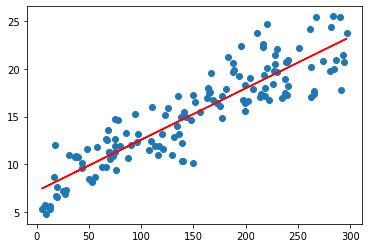

In [37]:
plt.scatter(x_train,y_train)
plt.plot(x_train,7.164676+0.053967*x_train,'r')
plt.show()

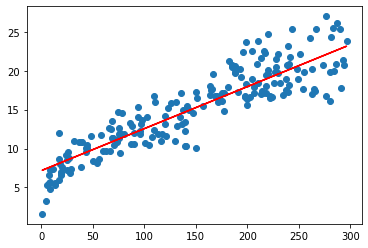

In [39]:
plt.scatter(df.TV,df.Sales)
plt.plot(df.TV,7.164676+0.053967*df.TV,'r')

In [45]:
x1=df[['TV','Radio']]
y1=df[['Sales']]

In [46]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=20)

In [48]:
x1_train_sm=sm.add_constant(x1_train)
lr1=sm.OLS(y1_train,x1_train_sm).fit()

In [49]:
lr1.params

const    4.896488
TV       0.052411
Radio    0.112454
dtype: float64

In [50]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     772.9
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           2.41e-75
Time:                        15:29:18   Log-Likelihood:                -248.92
No. Observations:                 140   AIC:                             503.8
Df Residuals:                     137   BIC:                             512.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8965      0.301     16.246      0.000       4.301       5.492
TV             0.0524      0.001     35.742      0.000       0.050       0.055
Radio          0.1125      0.008     13.526      0.000       0.096       0.129
==============================================================================
Omnibus:                        0.712   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.508
Skew:                           0.145   Prob(JB):                        0.776
Kurtosis:                       3.058   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""